# 3 - Regressions
In this notebook you’ll use linear regression (or if you they are relevant you can also use hypothesis-tests like t-tests or chi-squared tests) as a tool of exploratory data analysis. 

**t-test**

In [35]:
%%R
df <- df %>%
  mutate(income_group = if_else(median_income > median(median_income, na.rm = TRUE),
                               "High Income", "Low Income"))

t_test_result <- t.test(UnhealthyDaysMonth ~ income_group, data = df)

t_test_result


	Welch Two Sample t-test

data:  UnhealthyDaysMonth by income_group
t = -43.404, df = 2941.1, p-value < 2.2e-16
alternative hypothesis: true difference in means between group High Income and group Low Income is not equal to 0
95 percent confidence interval:
 -0.8508495 -0.7772983
sample estimates:
mean in group High Income  mean in group Low Income 
                 4.061204                  4.875278 



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 78 rows containing non-finite outside the scale range
(`stat_boxplot()`). 



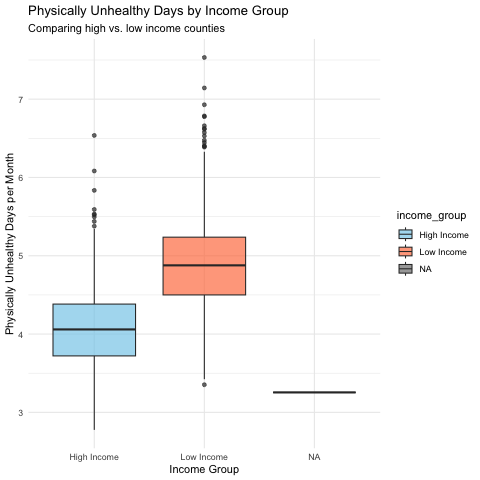

In [36]:
%%R
ggplot(df, aes(x = income_group, y = UnhealthyDaysMonth, fill = income_group)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Physically Unhealthy Days by Income Group",
    subtitle = "Comparing high vs. low income counties",
    x = "Income Group",
    y = "Physically Unhealthy Days per Month"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("High Income" = "skyblue", "Low Income" = "coral"))

**Single Variable Regressions**

Conduct at least a few single variable regressions. Single variable regressions take the form of **$y \sim x$.** It is likely that your Y variable will come from your dataset, whereas your Xs may be from either your data or the census data you have joined onto your data.

In [10]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [11]:
%%R

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [14]:
%%R
df <- read_csv('/Users/luciadelatorre/Desktop/COLUMBIA/GitHub/connect-to-census/county_health_income.csv', show_col_types = FALSE)
head(df)

# A tibble: 6 × 5
  GEOID median_income State   County  UnhealthyDaysMonth
  <chr>         <dbl> <chr>   <chr>                <dbl>
1 01001         68315 Alabama Autauga               4.30
2 01003         71039 Alabama Baldwin               3.88
3 01005         39712 Alabama Barbour               5.43
4 01007         50669 Alabama Bibb                  5.06
5 01009         57440 Alabama Blount                4.80
6 01011         36136 Alabama Bullock               5.81


### 1. Regression of Unhealthy Days ~ Median Income

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 79 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 79 rows containing missing values or values outside the scale range
(`geom_point()`). 



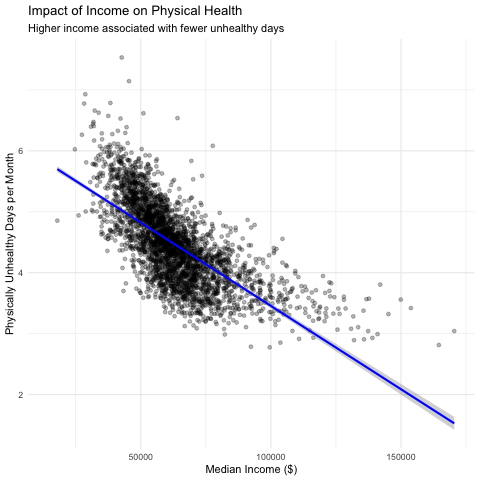

In [16]:
%%R

model1 <- lm(UnhealthyDaysMonth ~ median_income, data = df)
summary(model1)

ggplot(df, aes(x = median_income, y = UnhealthyDaysMonth)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "blue") +
  labs(
    title = "Impact of Income on Physical Health",
    subtitle = "Higher income associated with fewer unhealthy days",
    x = "Median Income ($)",
    y = "Physically Unhealthy Days per Month"
  ) +
  theme_minimal()

In [17]:
%%R

summary(model1)


Call:
lm(formula = UnhealthyDaysMonth ~ median_income, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30353 -0.33436  0.00377  0.30502  2.50944 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    6.190e+00  3.314e-02  186.80   <2e-16 ***
median_income -2.735e-05  5.058e-07  -54.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4769 on 3141 degrees of freedom
  (79 observations deleted due to missingness)
Multiple R-squared:  0.482,	Adjusted R-squared:  0.4818 
F-statistic:  2923 on 1 and 3141 DF,  p-value: < 2.2e-16



This regression reveals a highly significant relationship between income and health (p<0.001), indicating the association is almost certainly not due to chance. The R² of 0.482 means that median income alone explains 48.2% of the variation in unhealthy days across counties - a substantial proportion for a single variable. The negative coefficient (-2.735e-05) confirms that higher incomes are associated with fewer unhealthy days. With an adjusted R² nearly identical to the R² (0.4818), the model is robust despite its simplicity.

### 2. Regression of Unhealthy Days ~ Log Median Income

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 79 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 79 rows containing missing values or values outside the scale range
(`geom_point()`). 



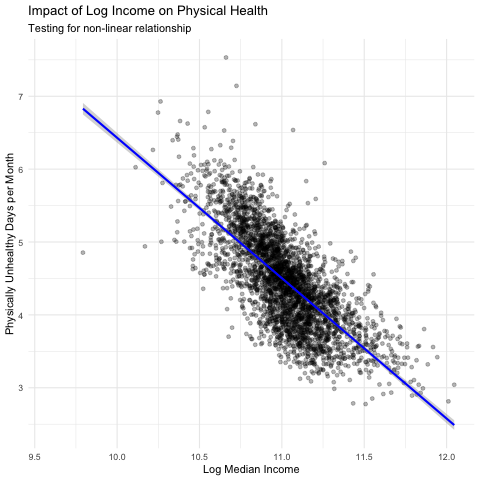

In [18]:
%%R

model2 <- lm(UnhealthyDaysMonth ~ log(median_income), data = df)
summary(model2)

# Scatter plot with log transformation
ggplot(df, aes(x = log(median_income), y = UnhealthyDaysMonth)) +
  geom_point(alpha = 0.3) +
  geom_smooth(method = "lm", color = "blue") +
  labs(
    title = "Impact of Log Income on Physical Health",
    subtitle = "Testing for non-linear relationship",
    x = "Log Median Income",
    y = "Physically Unhealthy Days per Month"
  ) +
  theme_minimal()


In [19]:
%%R
summary(model2)


Call:
lm(formula = UnhealthyDaysMonth ~ log(median_income), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97545 -0.31370  0.03109  0.29709  2.37576 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25.69529    0.35365   72.66   <2e-16 ***
log(median_income) -1.92651    0.03207  -60.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.452 on 3141 degrees of freedom
  (79 observations deleted due to missingness)
Multiple R-squared:  0.5346,	Adjusted R-squared:  0.5344 
F-statistic:  3608 on 1 and 3141 DF,  p-value: < 2.2e-16



This log-transformed model shows an even stronger relationship between income and health, with an R² of 0.5346 indicating that log(income) explains 53.5% of the variation in unhealthy days - better than the linear model. The relationship remains highly significant (p<0.001). The negative coefficient (-1.93) means that as income increases by 1% (multiplicatively), unhealthy days decrease by about 0.019 days. The improved R² suggests that the income-health relationship is non-linear, with income having a proportionally stronger effect at lower income levels.

### 2. Multivariate Regression with income and state

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 78 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 78 rows containing missing values or values outside the scale range
(`geom_point()`). 



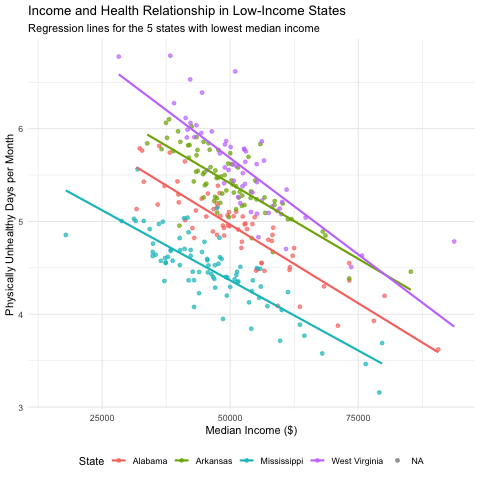

In [30]:
%%R

low_income_states <- df %>%
 group_by(State) %>%
 summarize(mean_income = mean(median_income, na.rm = TRUE)) %>%
 arrange(mean_income) %>%
 head(5) %>%
 pull(State)

# Filter data for these states
df_subset <- df %>%
 filter(State %in% low_income_states)

# Create visualization showing state-specific regression lines
ggplot(df_subset, aes(x = median_income, y = UnhealthyDaysMonth, color = State)) +
 geom_point(alpha = 0.7) +
 geom_smooth(method = "lm", se = FALSE) +
 labs(
   title = "Income and Health Relationship in Low-Income States",
   subtitle = "Regression lines for the 5 states with lowest median income",
   x = "Median Income ($)",
   y = "Physically Unhealthy Days per Month"
 ) +
 theme_minimal() +
 theme(legend.position = "bottom")

In [31]:
%%R
model_low_income_states <- lm(UnhealthyDaysMonth ~ median_income + State, data = df_subset)
summary(model_low_income_states)


Call:
lm(formula = UnhealthyDaysMonth ~ median_income + State, data = df_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.79036 -0.16169  0.00759  0.14747  0.98643 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.657e+00  8.063e-02   82.55   <2e-16 ***
median_income      -3.383e-05  1.446e-06  -23.39   <2e-16 ***
StateArkansas       4.440e-01  4.174e-02   10.64   <2e-16 ***
StateMississippi   -6.137e-01  4.150e-02  -14.79   <2e-16 ***
StateWest Virginia  6.979e-01  4.506e-02   15.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2476 on 274 degrees of freedom
  (78 observations deleted due to missingness)
Multiple R-squared:  0.8396,	Adjusted R-squared:  0.8373 
F-statistic: 358.7 on 4 and 274 DF,  p-value: < 2.2e-16



This regression for the five lowest-income states shows an extremely strong relationship between income and health outcomes, with an R² of 0.84 (much higher than the national model). For every $1,000 increase in median income, unhealthy days decrease by 0.034 days. The model reveals significant state effects: compared to the baseline state (likely Alabama), Arkansas and West Virginia have significantly more unhealthy days (+0.44 and +0.70 respectively), while Mississippi has fewer (-0.61), even after controlling for income. This suggests state-specific factors beyond income substantially influence health outcomes in these low-income regions.

`geom_smooth()` using formula = 'y ~ x'


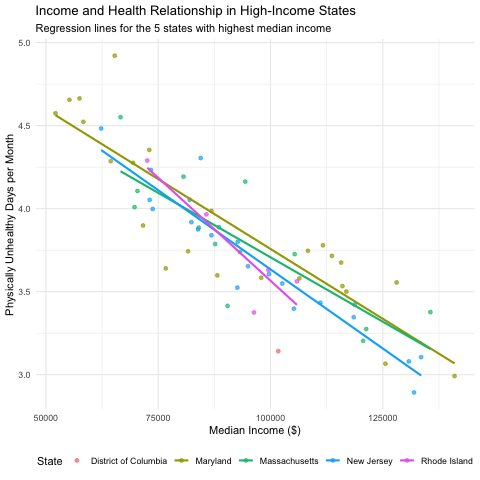

In [32]:
%%R

high_income_states <- df %>%
 group_by(State) %>%
 summarize(mean_income = mean(median_income, na.rm = TRUE)) %>%
 arrange(desc(mean_income)) %>%
 head(5) %>%
 pull(State)

# Filter data for these states
df_subset <- df %>%
 filter(State %in% high_income_states)

# Create visualization showing state-specific regression lines
ggplot(df_subset, aes(x = median_income, y = UnhealthyDaysMonth, color = State)) +
 geom_point(alpha = 0.7) +
 geom_smooth(method = "lm", se = FALSE) +
 labs(
   title = "Income and Health Relationship in High-Income States",
   subtitle = "Regression lines for the 5 states with highest median income",
   x = "Median Income ($)",
   y = "Physically Unhealthy Days per Month"
 ) +
 theme_minimal() +
 theme(legend.position = "bottom")

In [33]:
%%R
model_high_income_states <- lm(UnhealthyDaysMonth ~ median_income + State, data = df_subset)
summary(model_high_income_states)


Call:
lm(formula = UnhealthyDaysMonth ~ median_income + State, data = df_subset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51715 -0.08688 -0.00777  0.12503  0.56584 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         4.911e+00  2.392e-01  20.534  < 2e-16 ***
median_income      -1.739e-05  1.172e-06 -14.841  < 2e-16 ***
StateMaryland       5.807e-01  2.120e-01   2.739  0.00813 ** 
StateMassachusetts  5.234e-01  2.148e-01   2.436  0.01787 *  
StateNew Jersey     4.681e-01  2.123e-01   2.205  0.03134 *  
StateRhode Island   4.539e-01  2.274e-01   1.996  0.05053 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2073 on 59 degrees of freedom
Multiple R-squared:  0.8045,	Adjusted R-squared:  0.7879 
F-statistic: 48.56 on 5 and 59 DF,  p-value: < 2.2e-16



This regression for the five highest-income states shows a strong relationship between income and health, with an R² of 0.80. For every $1,000 increase in median income, unhealthy days decrease by 0.017 days - about half the effect size seen in low-income states. The model shows significant state effects: compared to Connecticut (baseline), Maryland, Massachusetts, and New Jersey all have significantly more unhealthy days (+0.58, +0.52, and +0.47 respectively), while Rhode Island's effect is borderline significant. This suggests substantial state-level factors affecting health outcomes beyond income, even in wealthy states.